5.0 5.0


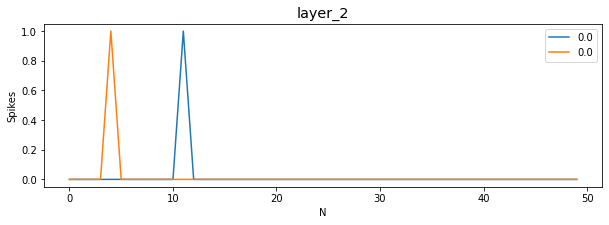

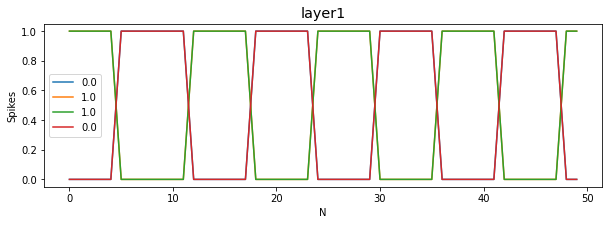

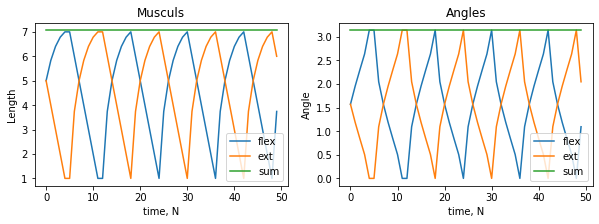

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Models.Limb import Limb
from Models.Runner import Runner

# activation functions
sigmoid = lambda t: 1/(1+np.exp(-t))
f = lambda t: (t >= 1).astype(float)
act1 = lambda x: ((x+1)//6)%2 #сюда надо веса и как либо обучать

N = 50

time = list(range(N))

segment = Limb(10, 3, 4, [1, 0], [0, 0, 0, 0], [])
simulation = Runner(N, segment)

segment = simulation.run_simulate(act1)
#print(simulation.get_detector())
simulation.display_layer("layer_2")
simulation.display_layer("layer1")
simulation.display_limb()
#time
time = list(range(N))

## Реализация перехода между слоями

$ L^i_n = f(M^{n, n-1}_{i, j}L^{j}_{n-1} + b^n_i)$ 

In [2]:
from Models.Network import f


In [3]:
f = lambda t: (t >= 1).astype(int)
act1 = lambda x: ((x+3)//5)%2 #сюда надо веса и как либо обучать

class CPGnet:
    f = lambda t: (t >= 1).astype(float)
    network = np.array([])
    weights = np.array([])
    def __init__(self, N, W):
        self.network = np.random.randint(2, size=N, dtype=int)
        size = (N, N)
        self.weigths = W
        
    def feedforward(self):
        W = self.weigths
        r = self.network
        self.network = f(np.matmul(W, r))
    
    def status(self):
        return self.network
    def get_weights(self):
        return self.weigths
        # нужно сдружить нейроны по схеме в статье
# Подумать как будет выглядеть вектор свободных членов для вычичслений
N = 6   
W = np.array([
    [1, 1, 1, 1, 1, 0],
    [-100, 1, 1, 1, 1, 0],
    [1, -100, 1, 1,1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, -100, 1, 1, 1],
    [1, 1, 1, 1, 1, 1]
]
            )
net = CPGnet(N, W)
r = net.status()
print(r)
W = net.get_weights()
print(W)
r = f(np.dot(W, r))
#print(r)
net.feedforward()
print(net.status())


[1 1 1 1 0 1]
[[   1    1    1    1    1    0]
 [-100    1    1    1    1    0]
 [   1 -100    1    1    1    0]
 [   0    0    0    0    1    0]
 [   0    1 -100    1    1    1]
 [   1    1    1    1    1    1]]
[1 0 0 0 0 1]
